In [2]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline 
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
wine = pd.read_csv('wine_train.csv') 
#wine.head()

In [4]:
wine.shape

(24, 6)

# a plot to show how wine price changes with temperature
## This scatter plot shows there is a strong positive linear relationship between Temperature and LogPrice, as Temperature increases. LogPrice increase.

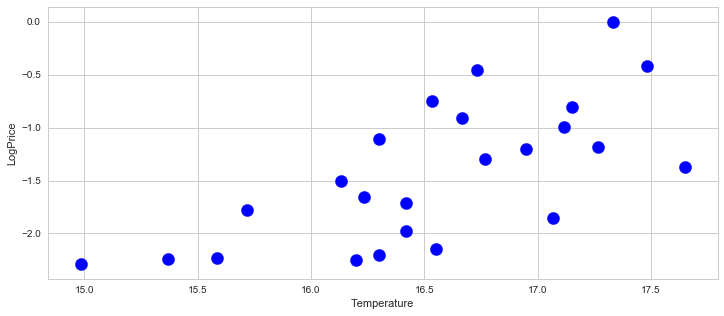

In [5]:
wine.plot.scatter(x = 'Temperature',y = 'LogPrice', c = ['blue'], s=150)

# Examine the data for any outliers and determine if any variables need normalization ?
## boxplot and Scatter pairplots are good tools for the detection of outliers, graph"boxplot for all variables", because all variables have huge differences in scale, therefore this graph could not show that much information . Then we use Seaborn to plot individual variables to examine if there are any outliers, as the plot shows that there are not any outliers for independent variables, as for "LogPrice" it appears it has been normalized. As we use the seaborn plot scatter pairplot, it does show a few outliers out of the 95% confident interval bounds, to avoid over fitting the model, that is not needed to normalize the variables.


<function matplotlib.pyplot.plot>

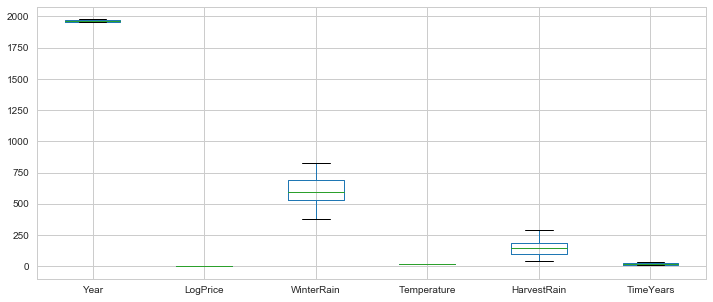

In [6]:
# boxplot for all variables
wine.boxplot(return_type='dict')
plt.plot

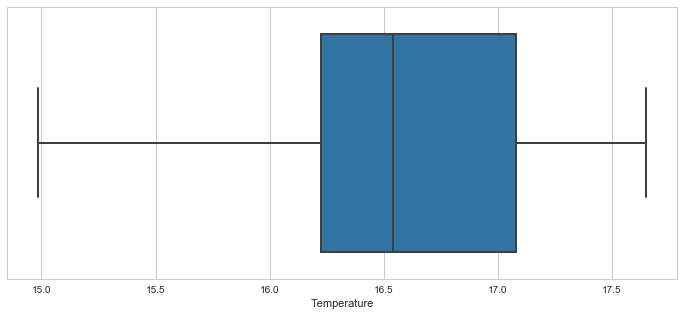

In [8]:
# box plot to check outlier for Independent variable'Temperature'
ax = sns.boxplot(x=wine["Temperature"])

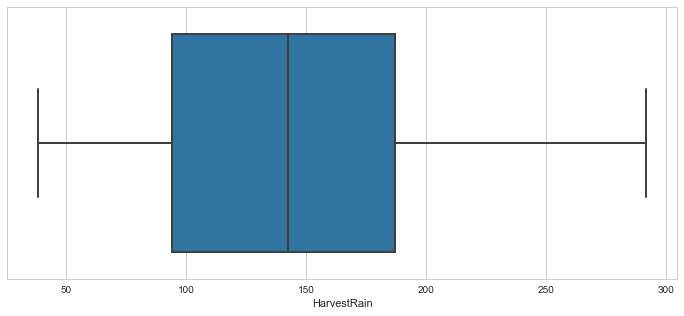

In [9]:
ax = sns.boxplot(x=wine["HarvestRain"])

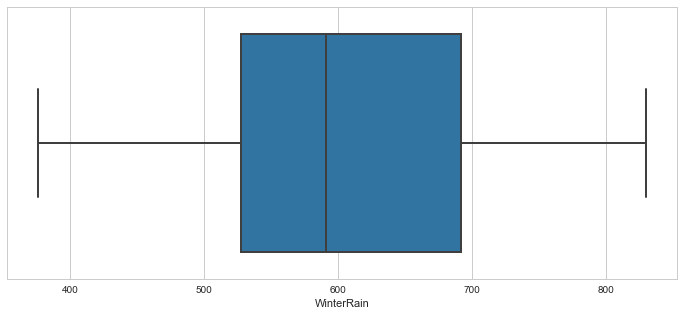

In [10]:
ax = sns.boxplot(x=wine["WinterRain"])

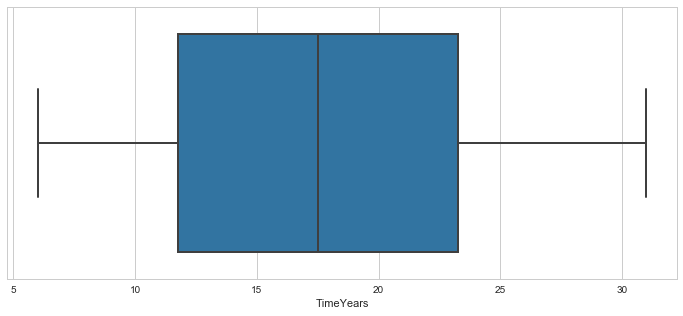

In [10]:
ax = sns.boxplot(x=wine["TimeYears"])

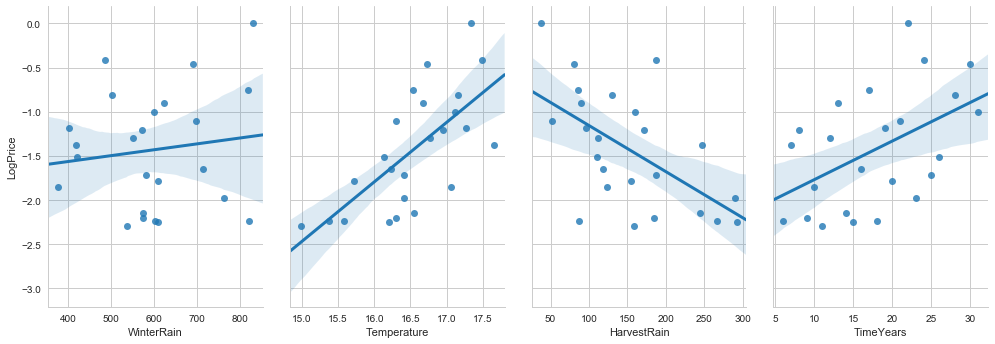

In [9]:
wine_g = sns.pairplot(wine, x_vars=["WinterRain","Temperature", "HarvestRain","TimeYears"], y_vars=["LogPrice"], kind="reg",size=5, aspect=0.7)

## The above graph has shown strong linear relationships between independent variables( "WinterRain","Temperature", "HarvestRain","TimeYears"), and dependent variables(LogPrice).

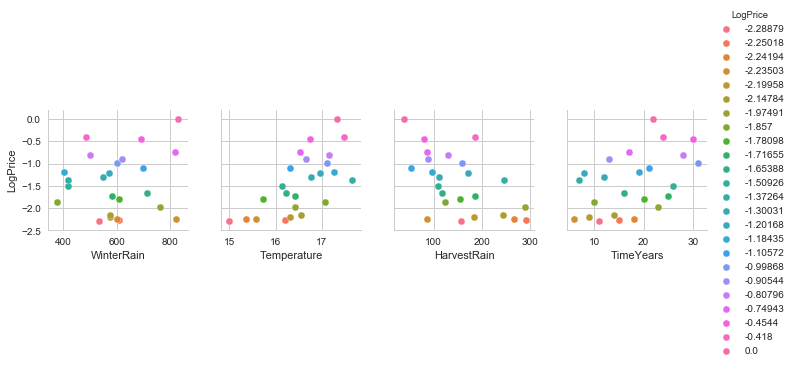

In [15]:
g = sns.pairplot(wine, x_vars=["WinterRain","Temperature", "HarvestRain","TimeYears"], y_vars =["LogPrice"], hue ="LogPrice")

## This scatter pairplot also shows good linear relationships between Price with Temperature( positive) and Price whith HarvestRain (negative) relationships.

# Generate a Linear Regression summary with one independent variable temperature with a constant value set. Document the result and explain the summary statistics table ?

## Coefficients:

## Below Table 1 is a summary statistics table with one independent variable temperature with Intercept: -14.83788859, Coefficients: 0.81391814 The equation is : y_hat = -14.83788859 + 0.81391814 * temperature.values: The equation shows that the coefficient for temperature in degrees is 0.81391814 LogPrice, it indicates that for every additional degree in temperature you can expect LogpPrices to increase by an average of 0.81391814 logPrice. Coefficients are important because it isolates the role of one variable from all of the others in the model.

## coefficient is a slope of the regression line, a linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).The slope of the line is b(coefficient), and a is the intercept (the value of y when x = 0), in Table 1 intercept is -14.83788859.

## The Mean squared error is a measure of the quality of an estimator, it is always non-negative, and the values which range closer to zero are better. In Table 1, Mean squared error: 0.176258366195

## variance score = 1 - var(y_hat - y_true) / var(y_true), and var(y_hat - y_true) = sum(error^2 - mean(error))/n, therefore, value closer to 1 is optimal. in Table 1, Variance score: 0.186638265929 which is not very good!

# Linear Regression based on original data sets
Summary statistics table

### Table 1: Regression with one independent variable(Temperature)

|independent variable	|Temperature---------	|HarvestRain----	|WinterRain-----	|TimeYears------|
|:----------------------|:-----------------------|:-------------------|:-------------------|:---------------|
|Coefficients:      	|0.8139181	             |	                  |	                   |                |
|Intercept:	            |-14.83788859			
|Mean squared error:	|0.176258366195			
|Variance score(R2):	|0.186638265929		

### Table 2: Regression with Two independent variable(Temperature, HarvestRain)

|independent variable	|Temperature------------|HarvestRain---------|WinterRain-----------|TimeYears------|
|:----------------------|:-----------------------|:-------------------|:-------------------|:---------------|
|Coefficients:	        |0.73096436              |	-0.00513391		
|Intercept:	            |-12.77185774			
|Mean squared error:	|0.103979062162			
|Variance score:(R2)	|0.520178292055	

### Table 3: Regression with Three independent variable(Temperature,HarvestRain,WinterRain )

|independent variable	 |Temperature-----------|HarvestRain---------|WinterRain-----------|TimeYears-------|
|:----------------------|:-----------------------|:-------------------|:-------------------|:---------------|
|Coefficients:	         |0.7819409	            |-0.00408897	     |0.0011783	
|Intercept:	             |-14.48356015			
|Mean squared error:	 |0.0664912365916			
|Variance score:(R2)	 |0.693169585864

### Table 4: Regression with Four independent variable(Temperature,HarvestRain,WinterRain, TimeYears )

|independent variable    |Temperature---------	|HarvestRain---------|WinterRain-----------|TimeYears-------|
|:----------------------|:-----------------------|:-------------------|:-------------------|:---------------|
|Coefficients:	         |5.34240366e-01	    |-4.01202900e-03	 |4.15980258e-04	   |5.42429223e-02
|Intercept:	             |-10.81710136			
|Mean squared error:	 |0.19341306646			
|Variance score:(R2)	 |0.107476198016			


# To further improve the model by adding another independent variable
# a commentary on R2 score changes after the addition of a second independent variable.
### from Summary statistics table

### For Table 2, i add a another independent variable"HarvestRain", doing this improved the model for Mean squared error, from 0.176258366195 reduce to 0.103979062162, for R2_score from 0.186638265929 increase to 0.520178292055

### For Table 3, i have 3 indepenent variables, "Temperature","HarvestRain","WinterRain",
### doing this improved the model for Mean squared error, from 0.103979062162 reduce to 0.0664912365916, for R2_score from 0.520178292055 increase to 0.693169585864

### For Table 4, i have 4 indepenent variables, "Temperature","HarvestRain","WinterRain"," TimeYears"
### doing this declined the model for Mean squared error, from 0.0664912365916 increase to 0.19341306646, for R2_score from 0.693169585864 decline to 0.107476198016

### Therefore we choose Table 3 for our best performing model.
### Regarding Table 3 model, I have chosed test_size=0.4, random_state=4, I have tried size: 0.2, 0.25, 0.30, and state from 0 to 4, but test_size=0.4 and random_state=4 give the best performance.


# Codes below are for Table 3. For table1, table2, and table4 the code is the  same, we use a linear Regression model to predict the target price by adding more variables for each table and then checking the statistical result, then we choose the best performance model, amongst the 4 tables, Table3 gives us the best result.

In [16]:
# Linear Regression model for Table3 with 3 independent variable('Temperature','HarvestRain','WinterRain')
wine_x=pd.DataFrame(wine.loc[:,['Temperature','HarvestRain','WinterRain']])#'TimeYears']])
#print(wine_x)
wine_y=pd.DataFrame(wine.loc[:,['LogPrice']])
#print(wine_y)

reg = linear_model.LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(wine_x, wine_y, test_size=0.4, random_state=4)
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# predict target price
y_pred = reg.predict(x_test)

# the coefficients
print('Coefficients for:Temperature,HarvestRain,WinterRain \n', reg.coef_)
#the intercept
print('intercept: ', reg.intercept_)
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Variance score: ', r2_score(y_test, y_pred))


Coefficients for:Temperature,HarvestRain,WinterRain 
 [[ 0.7819409  -0.00408897  0.0011783 ]]
intercept:  [-14.48356015]
Mean squared error:  0.0664912365916
Variance score:  0.693169585864


# Evidence that the model does not suffer from multicollinearity issues
### Below code: wine.corr() generated table clearly shows any two different variables that does not have correlation =(1 or -1), it indicated our model does not suffer from multicollinearity issues.

In [19]:
wine.corr()

,Year,LogPrice,WinterRain,Temperature,HarvestRain,TimeYears
Year,1.000000,-0.488085,-0.071217,-0.191228,0.130244,-1.000000
LogPrice,-0.488085,1.000000,0.131420,0.683967,-0.575197,0.488085
WinterRain,-0.071217,0.131420,1.000000,-0.283231,-0.222786,0.071217
Temperature,-0.191228,0.683967,-0.283231,1.000000,-0.130720,0.191228
HarvestRain,0.130244,-0.575197,-0.222786,-0.130720,1.000000,-0.130244
TimeYears,-1.000000,0.488085,0.071217,0.191228,-0.130244,1.000000


# Prediction values for the years 1978, 1979, 1980 based on my best performing model : Table 3 Model
### OLS Regression values y_hat = (-14.48356015) + (0.7819409)(Temperature) + ( -0.00408897)(HarvestRain) +(0.0011783) *(WinterRain)

### Table 5: Predict LogPrice V True LogPrice

|Price------|Predicted------|True------|
|:----------|:--------------|:--------------|
|1978	    |-1.42533175	|-1.30769
|1979	    |-1.49617086	|-1.5396
|1980	    |-1.59403332	|-1.99582

In [20]:
wine_test = pd.read_csv('wine_test.csv') 
#wine_test.head()
wine_test_x=pd.DataFrame(wine_test.loc[:,['Temperature', 'HarvestRain','WinterRain']])
wine_test_y=pd.DataFrame(wine.loc[:,['LogPrice']])
y_pred = reg.predict(wine_test_x)

for i in range(3):
    print(y_pred[i])

[-1.42533175]
[-1.49617086]
[-1.59403332]


# End